<a href="https://colab.research.google.com/github/Nihal-patel9/Covid-Case-Study/blob/main/Covid_Case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Covid Case Study

Q-1 :-  **Data Loading**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load all CSV file

In [ ]:

# Load COVID-19 confirmed cases data
df_covid_confirmed = pd.read_csv('/content/drive/MyDrive/Full Stack Data Science/covid case study/covid_19_confirmed_v1_lyst1747728690432.csv')

# Load COVID-19 deaths data
df_covid_deaths = pd.read_csv('/content/drive/MyDrive/Full Stack Data Science/covid case study/covid_19_deaths_v1_lyst1747728711771.csv')

# Load COVID-19 recovered data
df_covid_recovered = pd.read_csv('/content/drive/MyDrive/Full Stack Data Science/covid case study/covid_19_recovered_v1_lyst1747728719904.csv')

# Display the first few rows of each DataFrame to verify loading
print(df_covid_confirmed.head())
print(df_covid_deaths.head())
print(df_covid_recovered.head())

  Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  5/20/21  5/21/21  5/22/21  \
0        0        0        0        0  ...    64575    65080    65486   
1        0        0        0        0  ...   132118   132153   132176   
2        0        0        0        0  ...   126156   126434   126651   
3        0        0        0        0  ...    13569    13569    13569   
4        0        0        0        0  ...    31661    31909    32149   

   5/23/21  5/24/21  5/25/21  5/26/21  5/27/21  5/28/21  5/29/21  
0    65728    66275    66903    67743    68366   

Q-2:-  **Data exploration**

 Q-2.1 :- what is the structure of each dataset in terms of rows, columns and data types

Covid 19 Confirmed Cases Dataset Analysis

In [ ]:
print("Covid 19 Confirmed Cases Dataset Analysis")
df =  pd.read_csv('/content/drive/MyDrive/Full Stack Data Science/covid case study/covid_19_confirmed_v1_lyst1747728690432.csv')
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print("Data types:")
print(df.dtypes)

Covid 19 Confirmed Cases Dataset Analysis
Number of rows: 276
Number of columns: 498
Data types:
Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
5/25/21             int64
5/26/21             int64
5/27/21             int64
5/28/21             int64
5/29/21             int64
Length: 498, dtype: object


Covid 19 Deaths Dataset Analysis

In [ ]:
print("Covid 19 Deaths Dataset Analysis")
df = pd.read_csv('/content/drive/MyDrive/Full Stack Data Science/covid case study/covid_19_deaths_v1_lyst1747728711771.csv')
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print("Data types:")
print(df.dtypes)

Covid 19 Deaths Dataset Analysis
Number of rows: 277
Number of columns: 498
Data types:
Column1      object
Column2      object
Column3      object
Column4      object
Column5      object
              ...  
Column494    object
Column495    object
Column496    object
Column497    object
Column498    object
Length: 498, dtype: object


Covid 19 Recovered Dataset Analysis

In [ ]:
print("Covid 19 Recovered Dataset Analysis")
df =  pd.read_csv('/content/drive/MyDrive/Full Stack Data Science/covid case study/covid_19_recovered_v1_lyst1747728719904.csv')
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print("Data types:")
print(df.dtypes)

Covid 19 Recovered Dataset Analysis
Number of rows: 262
Number of columns: 498
Data types:
Column1      object
Column2      object
Column3      object
Column4      object
Column5      object
              ...  
Column494    object
Column495    object
Column496    object
Column497    object
Column498    object
Length: 498, dtype: object


Q-2.2:-  generate plots of confirmed cases over time for the top countries

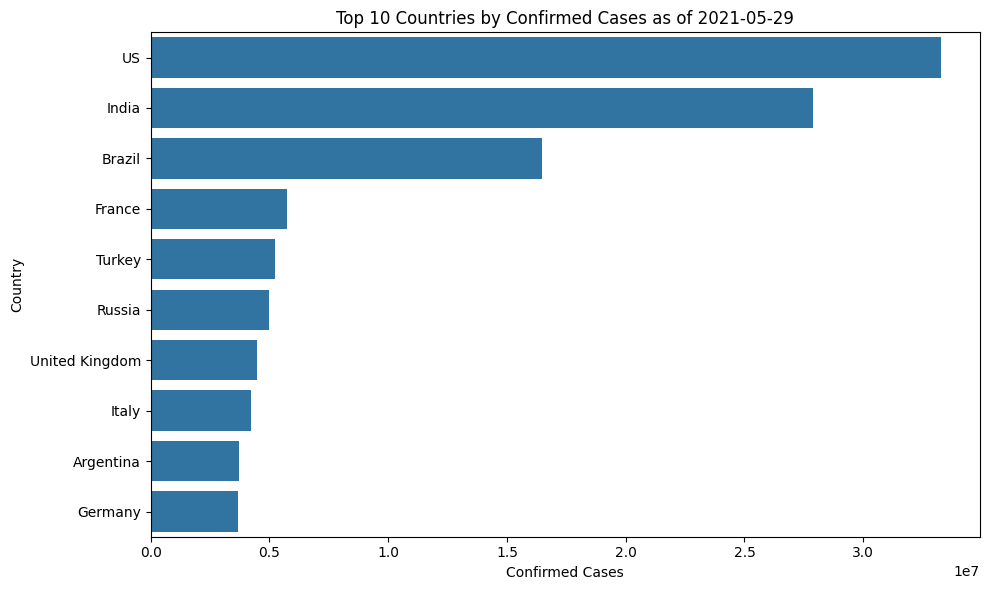

In [ ]:
# Change confirmed cases dataframe to long format
df_long = df_covid_confirmed.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],
    var_name='date',
    value_name='confirmed'
)

# Convert the 'date' column to datetime
df_long['date'] = pd.to_datetime(df_long['date'], format='%m/%d/%y')

# Get the latest date in the dataset
latest_date = df_long['date'].max()

# Sum confirmed cases for each country on the latest date
latest_confirmed = (
    df_long[df_long['date'] == latest_date]
    .groupby('Country/Region')['confirmed']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=latest_confirmed.values, y=latest_confirmed.index)  # Removed palette parameter
plt.title(f'Top 10 Countries by Confirmed Cases as of {latest_date.date()}')
plt.xlabel('Confirmed Cases')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


Q2.3:- generate plots of confirmed cases over time for china

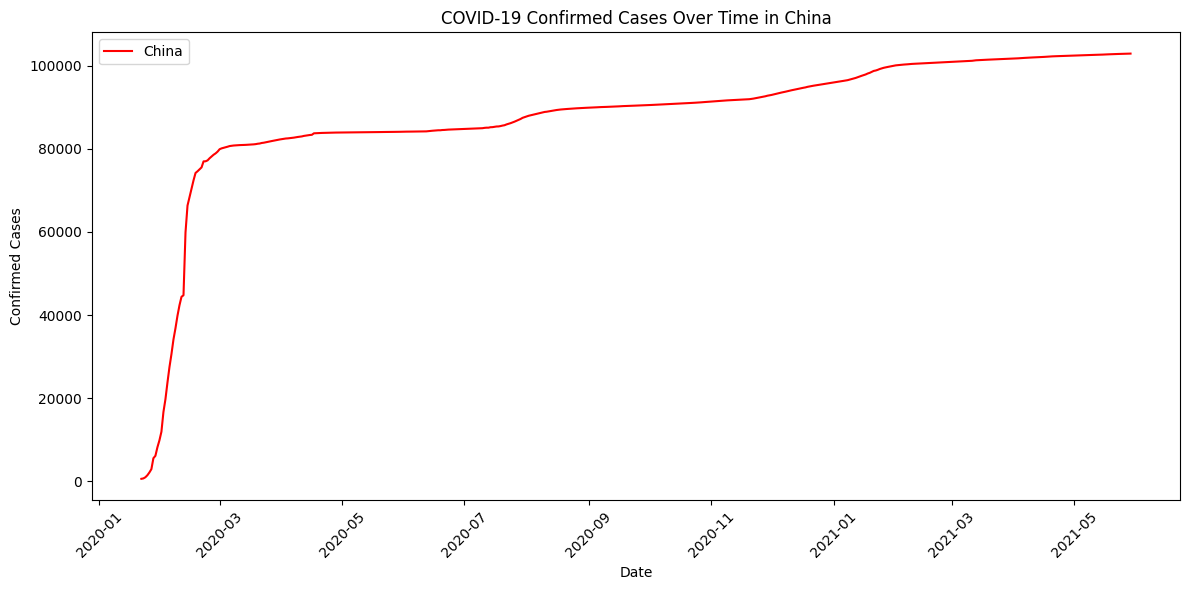

In [ ]:
# Filter data for China
china_data = df_long[df_long['Country/Region'] == 'China']

# Group by date and sum confirmed cases for China
china_daily = china_data.groupby('date')['confirmed'].sum()

# Plot confirmed cases over time for China
plt.figure(figsize=(12, 6))
plt.plot(china_daily.index, china_daily.values, label='China', color='red')
plt.title('COVID-19 Confirmed Cases Over Time in China')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Question-3 :- **Handling missing data**

Q-3.1:- identify these missing values and replace them using a suitable imputation method , such as forward filling , for time-series data

Missing value in confirmed dataset

In [ ]:
# Identify missing values in the time-series columns of df_covid_confirmed
missing_counts = df_covid_confirmed.isnull().sum()
print("Missing values per column:\n", missing_counts[missing_counts > 0])

# fill missing values for time-series columns (dates)
date_columns = df_covid_confirmed.columns[4:]
df_covid_confirmed[date_columns] = df_covid_confirmed[date_columns].ffill(axis=1)

# If there are still missing values at the start, fill them with 0
df_covid_confirmed[date_columns] = df_covid_confirmed[date_columns].fillna(0)

# Check again for missing values
remaining_missing_counts = df_covid_confirmed.isnull().sum()
print("Remaining missing values after imputation:\n", remaining_missing_counts[remaining_missing_counts > 0])

Missing values per column:
 Province/State    190
Lat                 2
Long                2
dtype: int64
Remaining missing values after imputation:
 Province/State    190
Lat                 2
Long                2
dtype: int64


Missing Value in death dataset

In [ ]:
# Identify missing values in the time-series columns of df_covid_deaths
missing_counts_deaths = df_covid_deaths.isnull().sum()
print("Missing values per column in deaths dataset:\n", missing_counts_deaths[missing_counts_deaths > 0])

# fill missing values for time-series columns (dates)
date_columns_deaths = df_covid_deaths.columns[4:]
df_covid_deaths[date_columns_deaths] = df_covid_deaths[date_columns_deaths].ffill(axis=1)

# If there are still missing values at the start, fill them with 0
df_covid_deaths[date_columns_deaths] = df_covid_deaths[date_columns_deaths].fillna(0)

# Check again for missing values
remaining_missing_counts_deaths = df_covid_deaths.isnull().sum()
print("Remaining missing values after imputation (deaths):\n", remaining_missing_counts_deaths[remaining_missing_counts_deaths > 0])

Missing values per column in deaths dataset:
 Column1     190
Column3       2
Column4       2
Column94      1
dtype: int64
Remaining missing values after imputation (deaths):
 Column1    190
Column3      2
Column4      2
dtype: int64


missing value in recover dataset

In [ ]:
# Identify missing values in the time-series columns of df_covid_recovered
missing_counts_recovered = df_covid_recovered.isnull().sum()
print("Missing values per column in recovered dataset:\n", missing_counts_recovered[missing_counts_recovered > 0])

# fill missing values for time-series columns (dates)
date_columns_recovered = df_covid_recovered.columns[4:]
df_covid_recovered[date_columns_recovered] = df_covid_recovered[date_columns_recovered].ffill(axis=1)

# If there are still missing values at the start, fill them with 0
df_covid_recovered[date_columns_recovered] = df_covid_recovered[date_columns_recovered].fillna(0)

# Check again for missing values
remaining_missing_counts_recovered = df_covid_recovered.isnull().sum()
print("Remaining missing values after imputation (recovered):\n", remaining_missing_counts_recovered[remaining_missing_counts_recovered > 0])


Missing values per column in recovered dataset:
 Column1     191
Column3       1
Column4       1
Column94      1
dtype: int64
Remaining missing values after imputation (recovered):
 Column1    191
Column3      1
Column4      1
dtype: int64


Question-4 :- **Data Cleaning and Preparation**

Q-4.1 :-  Replace blanks values in the province columns with "All Province"

In [ ]:
# Replace blank (NaN) values in the province/state column with "All Province" for all datasets

# For confirmed, the province/state column is 'Province/State'
df_covid_confirmed['Province/State'] = df_covid_confirmed['Province/State'].fillna("All Province")

# For deaths and recovered, the province/state column is 'Column1'
df_covid_deaths['Column1'] = df_covid_deaths['Column1'].fillna("All Province")
df_covid_recovered['Column1'] = df_covid_recovered['Column1'].fillna("All Province")

# Print the first few rows to verify
print(df_covid_confirmed[['Province/State', 'Country/Region']].head())
print(df_covid_deaths[['Column1', 'Column2']].head())
print(df_covid_recovered[['Column1', 'Column2']].head())

  Province/State Country/Region
0   All Province    Afghanistan
1   All Province        Albania
2   All Province        Algeria
3   All Province        Andorra
4   All Province         Angola
          Column1         Column2
0  Province/State  Country/Region
1    All Province     Afghanistan
2    All Province         Albania
3    All Province         Algeria
4    All Province         Andorra
          Column1         Column2
0  Province/State  Country/Region
1    All Province     Afghanistan
2    All Province         Albania
3    All Province         Algeria
4    All Province         Andorra


Question-5:- **Independent dataset Analysis**

Q-5.1:- Analyze the peak number of daily new cases in Germany, France and italy. which country experienced the highest single day surge, and when did it occur?

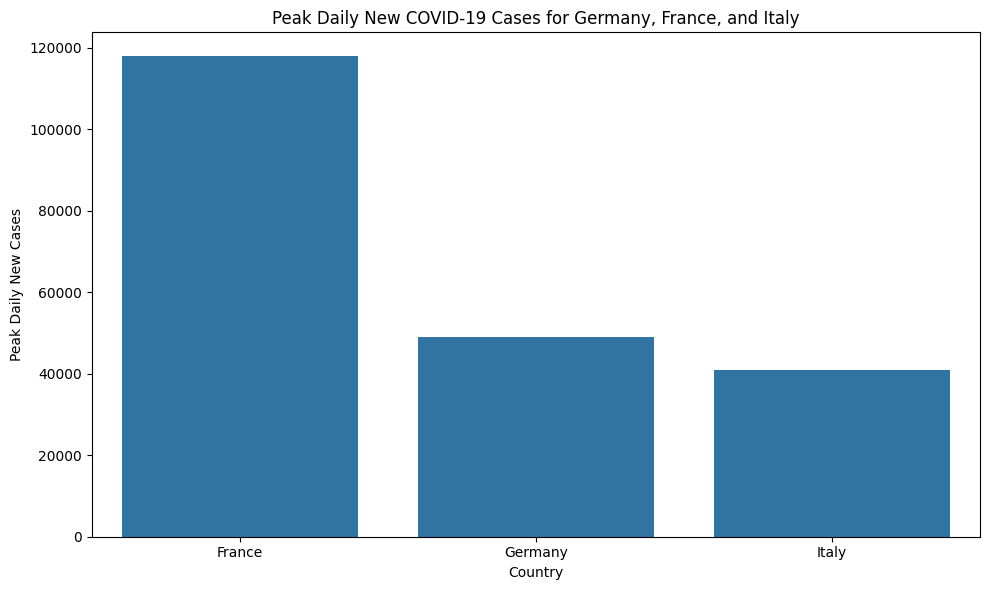

In [ ]:
# Reshape the confirmed cases dataframe to long format if not already defined
df_long = df_covid_confirmed.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],
    var_name='date',
    value_name='confirmed'
)

# Convert the 'date' column to datetime with a specified format
df_long['date'] = pd.to_datetime(df_long['date'], format='%m/%d/%y')

# Filter data for the selected countries
countries = ['Germany', 'France', 'Italy']  # Define your countries here
df_selected = df_long[df_long['Country/Region'].isin(countries)]

# Group by country and date, sum confirmed cases (in case of multiple provinces)
df_country_daily = df_selected.groupby(['Country/Region', 'date'])['confirmed'].sum().reset_index()

# Calculate daily new cases for each country
df_country_daily['daily_new'] = df_country_daily.groupby('Country/Region')['confirmed'].diff().fillna(0)

# Find the peak daily new cases for each country
peak_cases = df_country_daily.loc[df_country_daily.groupby('Country/Region')['daily_new'].idxmax()]

# Plot Peak Daily New Cases as a Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Country/Region', y='daily_new', data=peak_cases)  # Removed palette parameter
plt.title('Peak Daily New COVID-19 Cases for Germany, France, and Italy')
plt.xlabel('Country')
plt.ylabel('Peak Daily New Cases')
plt.tight_layout()
plt.show()


Q-5.2:- compare the recovery rates ( recoveries / confirmed cases) between canada and australia as of december 31, 2020. which country showed better management of the pandemic according to this metric

In [ ]:
# Use the already loaded and cleaned dataframes
date_str = '12/31/20'

#print("df_covid_recovered columns:", df_covid_recovered.columns.tolist())
#print("df_covid_recovered_fixed columns:", df_covid_recovered_fixed.columns.tolist())

df_covid_recovered_fixed =pd.read_csv('/content/drive/MyDrive/Full Stack Data Science/covid case study/covid_19_recovered_v1_lyst1747728719904.csv', header=1)

df_covid_recovered_fixed.columns = df_covid_recovered_fixed.columns.str.strip()

# Confirmed cases: sum across all provinces for each country
confirmed_canada = df_covid_confirmed[df_covid_confirmed['Country/Region'] == 'Canada'][date_str].sum()
confirmed_australia = df_covid_confirmed[df_covid_confirmed['Country/Region'] == 'Australia'][date_str].sum()

# Recovered cases: sum across all provinces for each country
recovered_canada = df_covid_recovered_fixed[df_covid_recovered_fixed['Country/Region'] == 'Canada'][date_str].astype(float).sum()
recovered_australia = df_covid_recovered_fixed[df_covid_recovered_fixed['Country/Region'] == 'Australia'][date_str].astype(float).sum()

# Calculate recovery rates
recovery_rate_canada = recovered_canada / confirmed_canada if confirmed_canada > 0 else float('nan')
recovery_rate_australia = recovered_australia / confirmed_australia if confirmed_australia > 0 else float('nan')

print(f"Canada recovery rate as of {date_str}: {recovery_rate_canada:.2%}")
print(f"Australia recovery rate as of {date_str}: {recovery_rate_australia:.2%}")

if recovery_rate_canada > recovery_rate_australia:
    print("Canada showed better management of the pandemic according to the recovery rate metric.")
elif recovery_rate_canada < recovery_rate_australia:
    print("Australia showed better management of the pandemic according to the recovery rate metric.")
else:
    print("Both countries had the same recovery rate as of December 31, 2020.")

Canada recovery rate as of 12/31/20: 84.47%
Australia recovery rate as of 12/31/20: 79.38%
Canada showed better management of the pandemic according to the recovery rate metric.


**Show by plot**

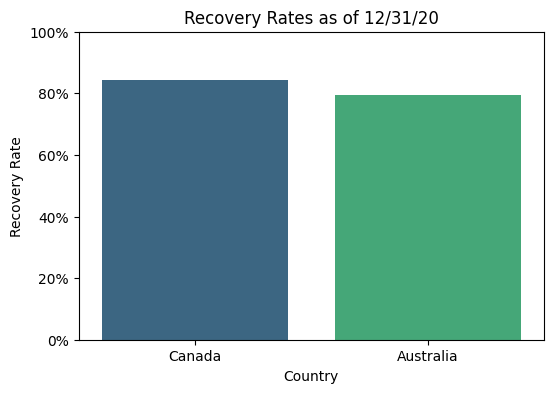

In [ ]:
date_str = '12/31/20'
recovered_cols = df_covid_recovered_fixed.columns

# Strip spaces from column names just in case
df_covid_recovered_fixed.columns = df_covid_recovered_fixed.columns.str.strip()
if date_str not in df_covid_recovered_fixed.columns:
    print(f"Available date columns: {df_covid_recovered_fixed.columns[-10:]}")
    raise KeyError(f"Date column '{date_str}' not found in recovered dataset.")

# Calculate recovery rates (already calculated in previous cell)
countries = ['Canada', 'Australia']
recovery_rates = [recovery_rate_canada, recovery_rate_australia]

# Create a DataFrame for plotting
data = pd.DataFrame({
    'Country': countries,
    'Recovery Rate': recovery_rates
})

# Plot recovery rates
plt.figure(figsize=(6, 4))
sns.barplot(x='Country', y='Recovery Rate', data=data, palette='viridis', hue='Country', legend=False)
plt.title(f'Recovery Rates as of {date_str}')
plt.ylabel('Recovery Rate')
plt.ylim(0, 1)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.show()

Q-5.3:-  what is the distribution of death rates (deaths / confirmed cases ) among provinces in canada ?identify the province with the highest and lowest death rate as of the latest data point

Province with highest death rate:
Province/State     Quebec
death_rate        0.03009
Name: 12, dtype: object

Province with lowest death rate:
Province/State    Grand Princess
death_rate                   0.0
Name: 3, dtype: object


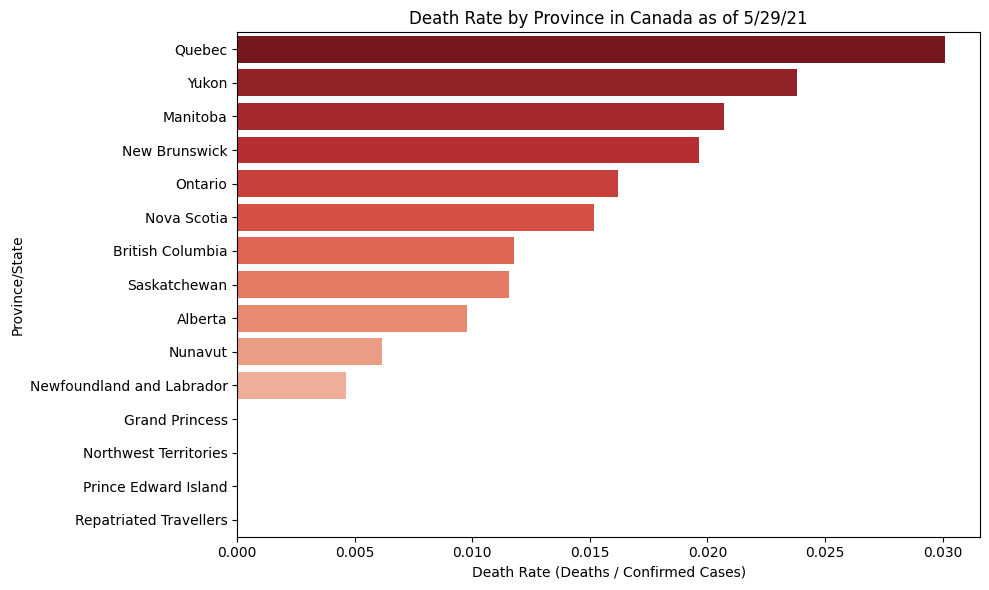

In [ ]:
# Fix the column names of df_covid_deaths using the first row as header
df_covid_deaths_fixed = df_covid_deaths.copy()
df_covid_deaths_fixed.columns = df_covid_deaths_fixed.iloc[0]
df_covid_deaths_fixed = df_covid_deaths_fixed.drop(0).reset_index(drop=True)

# Get the latest date column from the deaths and confirmed datasets
latest_date = df_covid_deaths_fixed.columns[-1]

# Filter for Canada in deaths and confirmed datasets
deaths_canada = df_covid_deaths_fixed[df_covid_deaths_fixed['Country/Region'] == 'Canada']
confirmed_canada = df_covid_confirmed[df_covid_confirmed['Country/Region'] == 'Canada']

# Merge on Province/State
merged = pd.merge(
    deaths_canada[['Province/State', latest_date]],
    confirmed_canada[['Province/State', latest_date]],
    on='Province/State',
    suffixes=('_deaths', '_confirmed')
)

# Convert to numeric
merged[latest_date + '_deaths'] = pd.to_numeric(merged[latest_date + '_deaths'], errors='coerce')
merged[latest_date + '_confirmed'] = pd.to_numeric(merged[latest_date + '_confirmed'], errors='coerce')

# Calculate death rate
merged['death_rate'] = merged[latest_date + '_deaths'] / merged[latest_date + '_confirmed']
merged = merged.replace([np.inf, -np.inf], np.nan).dropna(subset=['death_rate'])

# Identify province with highest and lowest death rate
highest = merged.loc[merged['death_rate'].idxmax()]
lowest = merged.loc[merged['death_rate'].idxmin()]

print("Province with highest death rate:")
print(highest[['Province/State', 'death_rate']])
print("\nProvince with lowest death rate:")
print(lowest[['Province/State', 'death_rate']])

# Plot distribution
plt.figure(figsize=(10, 6))
sns.barplot(
    data=merged.sort_values('death_rate', ascending=False),
    x='death_rate',
    y='Province/State',
    palette='Reds_r',
    hue='Province/State',
    legend=False
)
plt.title(f'Death Rate by Province in Canada as of {latest_date}')
plt.xlabel('Death Rate (Deaths / Confirmed Cases)')
plt.ylabel('Province/State')
plt.tight_layout()
plt.show()

Question-6:-  **Data Transformation**

Q-6.1:- transform the deaths dataset from wide format ( where each column represents a date) to long format , where each row represents a single date, ensuring that the date column is in datetime format. how would this transformation to executed.

In [ ]:
# Transformation the deaths dataset from wide format
df_deaths_long = df_covid_deaths_fixed.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],
    var_name='date',
    value_name='deaths'
)

# date format
df_deaths_long['date'] = pd.to_datetime(df_deaths_long['date'], format='%m/%d/%y')

print(df_deaths_long.head())


  Province/State Country/Region       Lat       Long       date deaths
0   All Province    Afghanistan  33.93911  67.709953 2020-01-22      0
1   All Province        Albania   41.1533    20.1683 2020-01-22      0
2   All Province        Algeria   28.0339     1.6596 2020-01-22      0
3   All Province        Andorra   42.5063     1.5218 2020-01-22      0
4   All Province         Angola  -11.2027    17.8739 2020-01-22      0


Q-6.2:- What is the total number of deaths reported per country up to the current date.

Total deaths reported per country up to the current date:
Country/Region
US                  123616044
Brazil               72624584
India                44428093
Mexico               43006478
United Kingdom       28928802
                      ...    
Dominica                    0
Micronesia                  0
Marshall Islands            0
Holy See                    0
Kiribati                    0
Name: deaths, Length: 193, dtype: int64


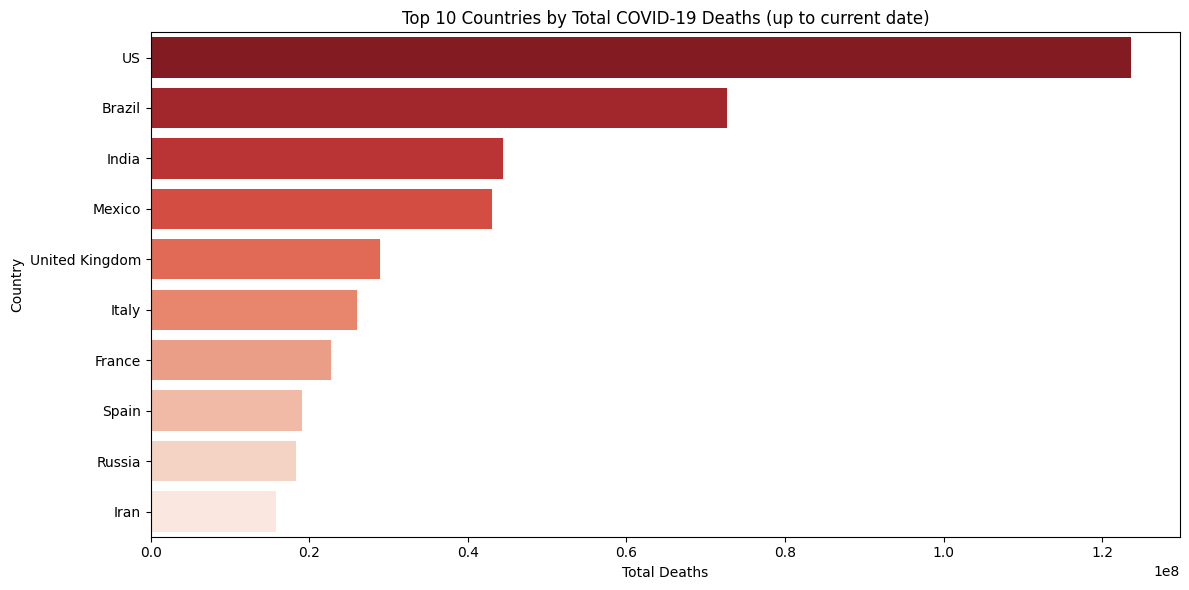

In [ ]:
# Calculate the total number of deaths reported per country up to the current date
total_deaths_per_country = df_deaths_long.groupby('Country/Region')['deaths'].apply(lambda x: pd.to_numeric(x, errors='coerce').sum()).sort_values(ascending=False)

print("Total deaths reported per country up to the current date:")
print(total_deaths_per_country)

# Plot the top 10 countries by total deaths
plt.figure(figsize=(12, 6))
top10_deaths = total_deaths_per_country.head(10)

# Create a DataFrame for plotting
data = pd.DataFrame({
    'Country': top10_deaths.index,
    'Total Deaths': top10_deaths.values
})

# show by plot
sns.barplot(x='Total Deaths', y='Country', data=data, palette='Reds_r', hue='Country', legend=False)
plt.title('Top 10 Countries by Total COVID-19 Deaths (up to current date)')
plt.xlabel('Total Deaths')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

Q-6.3:- what are the top 5 countries with the highest average daily deaths

Top 5 countries with the highest average daily deaths:
Country/Region
US        250234.906883
Brazil    147013.327935
India      89935.410931
Mexico     87057.647773
Italy      52633.382591
Name: deaths, dtype: float64


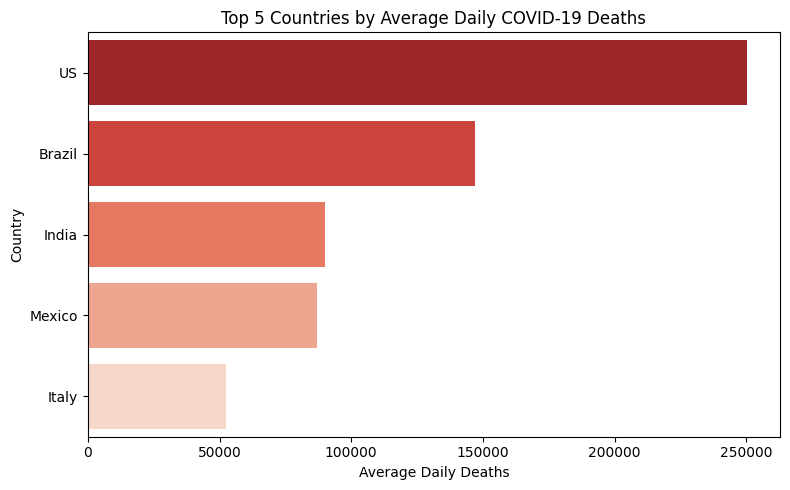

In [ ]:
# Calculate average daily deaths per country
df_deaths_long['deaths'] = pd.to_numeric(df_deaths_long['deaths'], errors='coerce')
avg_daily_deaths = (
    df_deaths_long.groupby('Country/Region')['deaths']
    .mean()
    .sort_values(ascending=False)
)

# Get top 5 countries
top5_avg_deaths = avg_daily_deaths.head(5)
print("Top 5 countries with the highest average daily deaths:")
print(top5_avg_deaths)

# Create a DataFrame for plotting
data = pd.DataFrame({
    'Country': top5_avg_deaths.index,
    'Average Daily Deaths': top5_avg_deaths.values
})

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Average Daily Deaths', y='Country', data=data, palette='Reds_r', hue='Country', legend=False)
plt.title('Top 5 Countries by Average Daily COVID-19 Deaths')
plt.xlabel('Average Daily Deaths')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

Question-7:- **Data Merging**

Q-7.1:- How would you merge the transformed datasets of confirmed cases, deaths and recoveries on the 'Country/Region' And 'Date' columns to create a comprehensive view of pandemic's impact

In [ ]:
# transform the recovered dataset from wide to long format
df_recovered_long = df_covid_recovered_fixed.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],
    var_name='date',
    value_name='recovered'
)

# date format
df_recovered_long['date'] = pd.to_datetime(df_recovered_long['date'], format='%m/%d/%y')

# Ensure Lat and Long columns are float in all DataFrames before merging
for df in [df_long, df_deaths_long, df_recovered_long]:
    df['Lat'] = pd.to_numeric(df['Lat'], errors='coerce')
    df['Long'] = pd.to_numeric(df['Long'], errors='coerce')

# Merge confirmed and deaths datasets on Country/Region, Province/State, and date
merged_df = pd.merge(
    df_long,
    df_deaths_long,
    on=['Province/State', 'Country/Region', 'Lat', 'Long', 'date'],
    how='outer'
)

# Merge the result with recovered dataset
merged_df = pd.merge(
    merged_df,
    df_recovered_long,
    on=['Province/State', 'Country/Region', 'Lat', 'Long', 'date'],
    how='outer'
)

# Sort and reset index for clarity
merged_df = merged_df.sort_values(['Country/Region', 'Province/State', 'date']).reset_index(drop=True)

print(merged_df.head())

  Province/State Country/Region       Lat       Long       date  confirmed  \
0   All Province    Afghanistan  33.93911  67.709953 2020-01-22        0.0   
1   All Province    Afghanistan  33.93911  67.709953 2020-01-23        0.0   
2   All Province    Afghanistan  33.93911  67.709953 2020-01-24        0.0   
3   All Province    Afghanistan  33.93911  67.709953 2020-01-25        0.0   
4   All Province    Afghanistan  33.93911  67.709953 2020-01-26        0.0   

   deaths  recovered  
0     0.0        NaN  
1     0.0        NaN  
2     0.0        NaN  
3     0.0        NaN  
4     0.0        NaN  


Q-7.2:- Analyze the monthly sum of confirmed cases, deaths and recoveries for countries to understand the progression of the pandemic. [from the merged dataset]

  Country/Region    month  confirmed  deaths  recovered
0    Afghanistan  2020-01        0.0     0.0        0.0
1    Afghanistan  2020-02        6.0     0.0        0.0
2    Afghanistan  2020-03     1164.0    27.0       26.0
3    Afghanistan  2020-04    27074.0   890.0     2927.0
4    Afghanistan  2020-05   225674.0  5007.0    24129.0


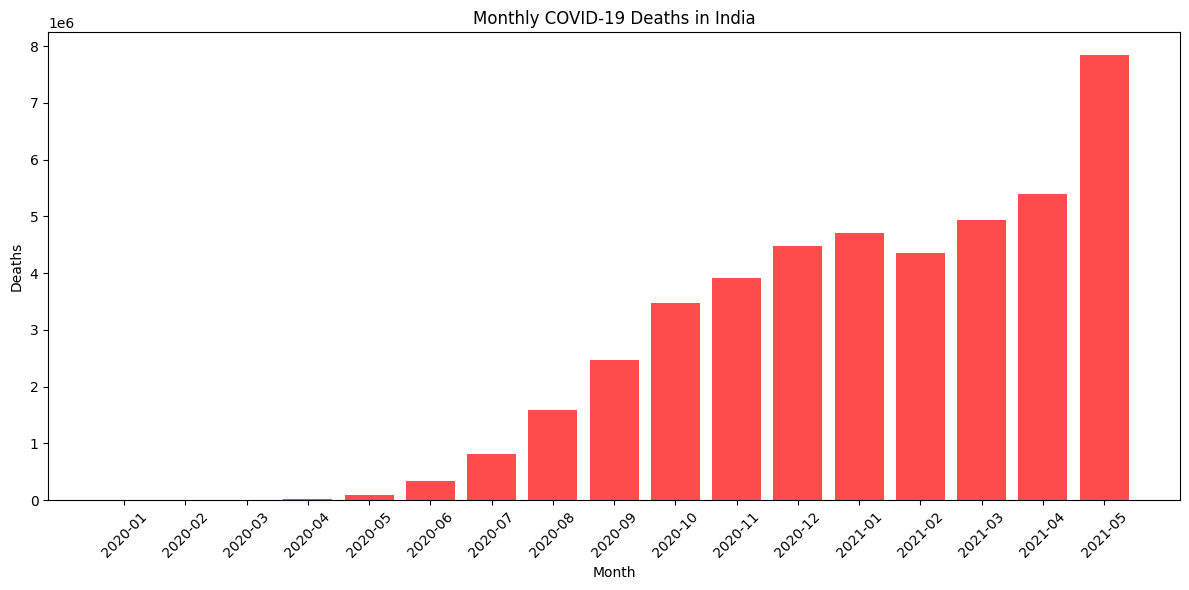

In [ ]:
# Extract the month from the 'date' column and create a new 'month' column
# The month will be represented as YYYY-MM for easy sorting
merged_df['month'] = merged_df['date'].dt.to_period('M').astype(str)

# Group by Country/Region and month, then sum confirmed, deaths, and recovered
monthly_summary = (
    merged_df.groupby(['Country/Region', 'month'])[['confirmed', 'deaths', 'recovered']]
    .sum()
    .reset_index()
)

# Display the first few rows to understand the structure
print(monthly_summary.head())

# Example: Plot monthly progression for a selected country
selected_country = 'India'
country_monthly = monthly_summary[monthly_summary['Country/Region'] == selected_country]

# Create plot: Monthly deaths as a bar plot for the selected country

plt.figure(figsize=(12, 6))
plt.bar(country_monthly['month'].astype(str), country_monthly['deaths'], color='red', alpha=0.7)
plt.title(f'Monthly COVID-19 Deaths in {selected_country}')
plt.xlabel('Month')
plt.ylabel('Deaths')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Q-7.3:- Redo the analysis in Question 7.2 for the united States, Italy and Brazil.

In [ ]:
# Select the countries of interest
countries_of_interest = ['US', 'Italy', 'Brazil']

# Filter the monthly_summary for these countries
filtered_monthly = monthly_summary[monthly_summary['Country/Region'].isin(countries_of_interest)]

# Plot monthly progression for each country
plt.figure(figsize=(16, 8))
for country in countries_of_interest:
    country_data = filtered_monthly[filtered_monthly['Country/Region'] == country]
    plt.plot(country_data['month'].astype(str), country_data['confirmed'], label=f'{country} Confirmed')
    plt.plot(country_data['month'].astype(str), country_data['deaths'], label=f'{country} Deaths', linestyle='--')
    plt.plot(country_data['month'].astype(str), country_data['recovered'], label=f'{country} Recovered', linestyle=':')

plt.title('Monthly COVID-19 Progression: Confirmed, Deaths, and Recovered (US, Italy, Brazil)')
plt.xlabel('Month')
plt.ylabel('Cases')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Question-8:- **Combined Data Analysis**

Q-8.1:- For the combined dataset, identify the three countries with the highest average death rates (deaths/ confirmed case) throughout 2020. what might this indicate about the pandemic's impact in these countries ?

Top 3 countries with the highest average death rates in 2020:
Yemen: 28.50%
MS Zaandam: 22.15%
Mexico: 10.08%


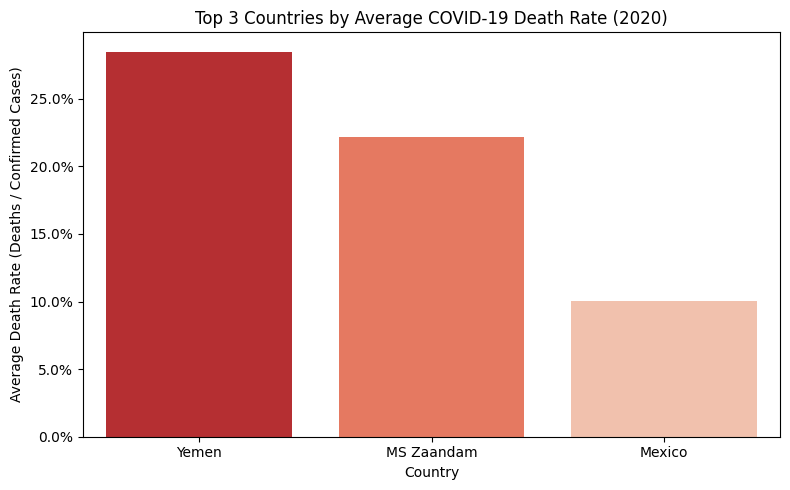

In [ ]:
# Filter merged_df for the year 2020
df_2020 = merged_df[(merged_df['date'] >= '2020-01-01') & (merged_df['date'] < '2021-01-01')]

# Group by country and calculate total deaths and confirmed cases in 2020
country_totals_2020 = df_2020.groupby('Country/Region')[['deaths', 'confirmed']].sum(min_count=1)

# Calculate average death rate (deaths / confirmed)
country_totals_2020['death_rate'] = country_totals_2020['deaths'] / country_totals_2020['confirmed']

# Remove countries with zero or NaN confirmed cases to avoid division by zero
country_totals_2020 = country_totals_2020[country_totals_2020['confirmed'] > 0].dropna(subset=['death_rate'])

# Get the top 3 countries by average death rate
top3_death_rates = country_totals_2020.sort_values('death_rate', ascending=False).head(3)

# Print country names and death rates
print("Top 3 countries with the highest average death rates in 2020:")
for country, row in top3_death_rates.iterrows():
    print(f"{country}: {row['death_rate']:.2%}")

# Create a DataFrame for plotting
data = pd.DataFrame({
    'Country': top3_death_rates.index,
    'Average Death Rate': top3_death_rates['death_rate']
})

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(
    x='Country',
    y='Average Death Rate',
    data=data,
    palette='Reds_r',
    hue='Country',
    legend=False
)
plt.title('Top 3 Countries by Average COVID-19 Death Rate (2020)')
plt.ylabel('Average Death Rate (Deaths / Confirmed Cases)')
plt.xlabel('Country')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.1%}'.format(y)))
plt.tight_layout()
plt.show()

Q-8.2:- Using the merged dataset, compare the total number of recoveries to the total number of deaths in South Africa. What can this tell us about the outcomes of covid-19 cases in the country?

South Africa - Latest Date: 2021-05-29
Total Recoveries: 1,554,184
Total Deaths: 56,363
Recovery-to-Death Ratio: 27.57


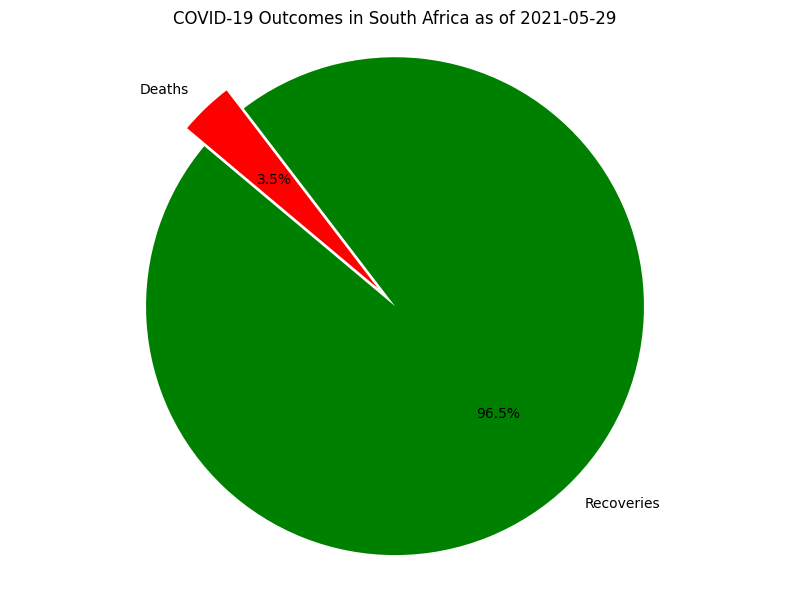

In [ ]:
# Filter merged_df for South Africa and the latest available date
latest_date_sa = merged_df[merged_df['Country/Region'] == 'South Africa']['date'].max()
sa_latest = merged_df[(merged_df['Country/Region'] == 'South Africa') & (merged_df['date'] == latest_date_sa)]

# Sum total recoveries and deaths across all provinces for the latest date
total_recoveries = sa_latest['recovered'].sum(skipna=True)
total_deaths = sa_latest['deaths'].sum(skipna=True)

print(f"South Africa - Latest Date: {latest_date_sa.date()}")
print(f"Total Recoveries: {int(total_recoveries):,}")
print(f"Total Deaths: {int(total_deaths):,}")

if total_deaths > 0:
    recovery_to_death_ratio = total_recoveries / total_deaths
    print(f"Recovery-to-Death Ratio: {recovery_to_death_ratio:.2f}")
else:
    print("No deaths reported, cannot compute recovery-to-death ratio.")

# Plot recoveries vs deaths using a pie chart
plt.figure(figsize=(8, 6))
labels = ['Recoveries', 'Deaths']
sizes = [total_recoveries, total_deaths]
colors = ['green', 'red']
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title(f'COVID-19 Outcomes in South Africa as of {latest_date_sa.date()}')
plt.axis('equal')
plt.tight_layout()
plt.show()

Q-8.3:- Analyze the ratio of recoveries to confirmed cases for the united states monthly from march 2020 to may 2021. which month experienced the highest recovery ratio, and what could be the potential reasons ?

Monthly recovery ratios for the United States (March 2020 - May 2021):
        month  recovery_ratio
3045  2020-03        0.017614
3046  2020-04        0.087577
3047  2020-05        0.191507
3048  2020-06        0.268365
3049  2020-07        0.305540
3050  2020-08        0.341899
3051  2020-09        0.378911
3052  2020-10        0.395799
3053  2020-11        0.378082
3054  2020-12        0.141402
3055  2021-01        0.000000
3056  2021-02        0.000000
3057  2021-03        0.000000
3058  2021-04        0.000000
3059  2021-05        0.000000

Month with highest recovery ratio: 2020-10
Highest recovery ratio: 39.58%


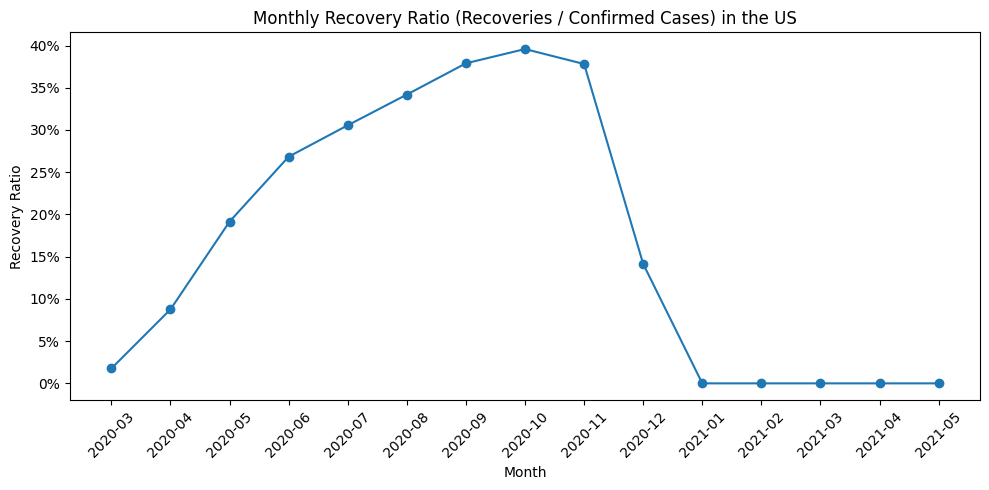


 Reason :
The highest recovery ratio occurred in 2020-10 with a ratio of 39.58%.
- Increased vaccination rates leading to higher recovery rates.
- Implementation of effective public health measures, such as mask mandates and social distancing.
- Enhanced healthcare capacity and resources available for treating COVID-19 patients.
- Greater public awareness and adherence to health guidelines, resulting in fewer severe cases.


In [ ]:
# Filter US monthly data from March 2020 to May 2021
# Define us_monthly by filtering the monthly_summary DataFrame
us_monthly = monthly_summary[monthly_summary['Country/Region'] == 'US']

us_monthly_filtered = us_monthly[(us_monthly['month'] >= '2020-03') & (us_monthly['month'] <= '2021-05')].copy()

# Calculate recovery ratio for each month
us_monthly_filtered['recovery_ratio'] = us_monthly_filtered['recovered'] / us_monthly_filtered['confirmed']

# Find the month with the highest recovery ratio
max_ratio_row = us_monthly_filtered.loc[us_monthly_filtered['recovery_ratio'].idxmax()]

print("Monthly recovery ratios for the United States (March 2020 - May 2021):")
print(us_monthly_filtered[['month', 'recovery_ratio']])

print(f"\nMonth with highest recovery ratio: {max_ratio_row['month']}")
print(f"Highest recovery ratio: {max_ratio_row['recovery_ratio']:.2%}")

# Plot the recovery ratio over time
plt.figure(figsize=(10, 5))
plt.plot(us_monthly_filtered['month'].astype(str), us_monthly_filtered['recovery_ratio'], marker='o')
plt.title('Monthly Recovery Ratio (Recoveries / Confirmed Cases) in the US')
plt.xlabel('Month')
plt.ylabel('Recovery Ratio')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.tight_layout()
plt.show()

print("\n Reason :")
print("The highest recovery ratio occurred in", max_ratio_row['month'],
    "with a ratio of {:.2%}.".format(max_ratio_row['recovery_ratio']))

print("- Increased vaccination rates leading to higher recovery rates.")
print("- Implementation of effective public health measures, such as mask mandates and social distancing.")
print("- Enhanced healthcare capacity and resources available for treating COVID-19 patients.")
print("- Greater public awareness and adherence to health guidelines, resulting in fewer severe cases.")